# Project Goal:

Pathrise is an online mentorship program that helps job seekers get the best possible jobs in the technology sector. 
There is a data challenge assignment where the main goal of the analysis is to gain insight into whether a fellow will eventually be placed at a company and how long it typically takes to be placed.

This task is based on a data set consisting of 2544 entries with 14 features that refer to the fellows from the moment they entered the program. It is known that 5% of the values in the dataset are missing due to various reasons during the data collection process.

In order to analyze the dataset, I need to understand and preprocess the dataset. Then I will apply three supervised classification algorithms including Support Vector Machine (SVM), Decision Tree, and Random Forest. I will then compare their results and take the best one for my study.

## 1. Import the required libraries and packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Reading the dataset

In [2]:
# Read the Data
df=pd.read_excel('Data_Pathrise.xlsx')
# Remove the space in columns
df.columns= df.columns.str.rstrip()

## 3. Understanding the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [4]:
set(df['pathrise_status'])

{'Active',
 'Break',
 'Closed Lost',
 'Deferred',
 'MIA',
 'Placed',
 'Withdrawn',
 'Withdrawn (Failed)',
 'Withdrawn (Trial)'}

In [5]:
set(df['primary_track'])

{'Data', 'Design', 'Marketing', 'PSO', 'SWE', 'Web'}

In [6]:
set(df['cohort_tag'])
#df['cohort_tag'].value_counts()

{'APR18A',
 'APR18B',
 'APR19A',
 'APR19B',
 'APR20A',
 'AUG18A',
 'AUG19A',
 'AUG19B',
 'AUG19C',
 'DEC18A',
 'DEC19A',
 'FEB18A',
 'FEB19A',
 'FEB19B',
 'FEB20A',
 'FEB20B',
 'FEB20a',
 'JAN18A',
 'JAN19A',
 'JAN19B',
 'JAN20A',
 'JAN20B',
 'JUL19A',
 'JUL19B',
 'JUN18A',
 'JUN19A',
 'JUN19B',
 'MAR18A',
 'MAR19A',
 'MAR19B',
 'MAR20A',
 'MAY18A',
 'MAY19A',
 'MAY19B',
 'NOV18A',
 'NOV19A',
 'NOV19B',
 'OCT18A',
 'OCT18B',
 'OCT19A',
 'OCT19B',
 'OCT21A',
 'SEP18A',
 'SEP18B',
 'SEP18C',
 'SEP19A',
 'SEP19B',
 nan}

<AxesSubplot: xlabel='program_duration_days'>

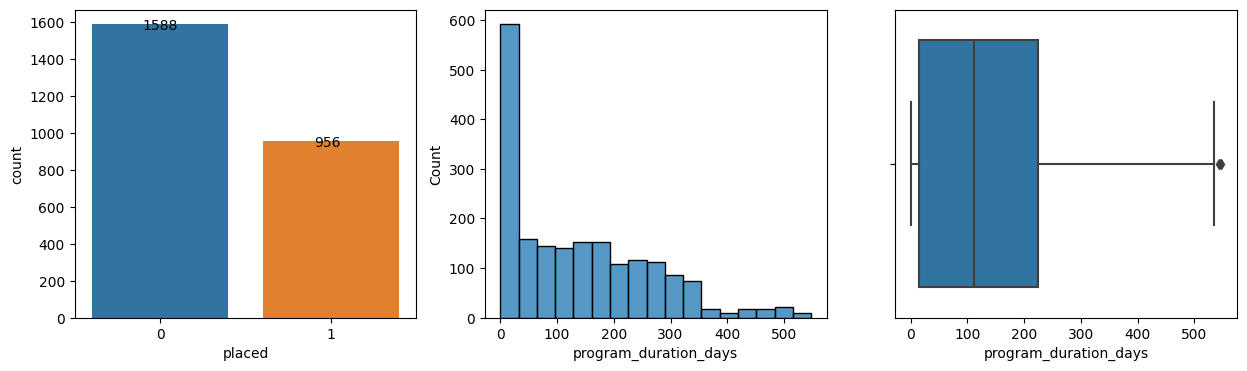

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15,4)


sns.countplot(x='placed',data=df, ax=ax[0])
for i, p in enumerate(ax[0].patches):
        ax[0].annotate('{:d}'.format(df['placed'].value_counts()[i]), (p.get_x()+0.3, p.get_height()-30))


sns.histplot(x='program_duration_days', data=df, ax=ax[1])

sns.boxplot(x='program_duration_days', data=df, ax=ax[2])

In [8]:
print("Missing values:")
df.isna().sum()

Missing values:


id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

## 4. EDA, remove outliers, and dealing with the missing values
According to the information of the dataset and the plots for the target features *placed* and *program_duration_days*, we need to deal with the data imbalance, missing values and outliers.

#### 4.1. Removing the ID feature
Since the study is not at the individual level, the fellows' IDs are not required and can be removed from the dataset. This makes the dataset smaller.

In [9]:
df=df.drop(['id'],axis=1)  

### 4.2. Program duration days

There are 616 values missing from the *program_duration_days* column. We need to get rid of these missing values by either removing these entries or filling them in. 

#### 4.2.1. Option 1
According to the histogram and boxplot, the distribution of program duration days is skewed with a long tail on the right side.
Furthermore, we can see that the number of non-placed fellows is about 60% higher than the number of placed fellows. Therefore, the dataset is not balanced in this respect. According to the histogram, we can conclude that the data for the Fellows who are on the list for more than 370 days are not reliable, since the number of samples for these ranges is very limited. Therefore, we consider them as outliers and remove them. 

By removing the outliers, we reduce the total number of samples in the dataset by 3.9% (0.3% missing values and 2.7% values greater than 370 days.) The new dataset size is 1853. After plotting the histogram of the feature Placed and Program Duration Days, we can see that removing the outliers helped to balance the dataset with respect to the Placed features. Furthermore, we can see that most of the removed entries were for the fellows who were not placed at the time of data collection. In addition, the distribution of the program duration days looks much more reasonable.

In [10]:
print(f"- Maximum Program Duration Days: {int(df['program_duration_days'].max())}")
print(f"- Number of missing Program Duration Day values: {df['program_duration_days'].isnull().sum()}")
df_1 = df[(df["program_duration_days"] <370)]
print(f"- Number of missing Program Duration Day values after removing the outliers: {df_1['program_duration_days'].isnull().sum()}")
print("- {:.1f}% of the enteries are removed ({:.1f}% missing values).".format(100*(df['program_duration_days'].count()-df_1['program_duration_days'].count())/df['program_duration_days'].count(),df['program_duration_days'].isnull().sum()/df['program_duration_days'].count()))
print(f"- Number of remaining enteries after removing the outliers: {df_1['program_duration_days'].count()}")

- Maximum Program Duration Days: 548
- Number of missing Program Duration Day values: 616
- Number of missing Program Duration Day values after removing the outliers: 0
- 3.9% of the enteries are removed (0.3% missing values).
- Number of remaining enteries after removing the outliers: 1853


<AxesSubplot: xlabel='program_duration_days'>

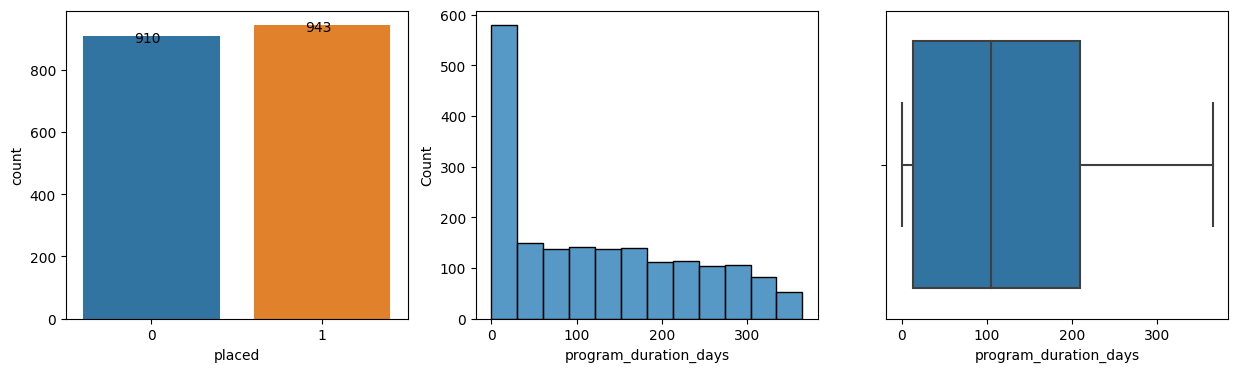

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15,4)


sns.countplot(x='placed',data=df_1, ax=ax[0])
for i, p in enumerate(ax[0].patches):
        ax[0].annotate('{:d}'.format(df_1['placed'].value_counts()[i]), (p.get_x()+0.3, p.get_height()-20))


sns.histplot(x='program_duration_days', data=df_1, ax=ax[1])

sns.boxplot(x='program_duration_days', data=df_1, ax=ax[2])

#### 4.2.2. Option 2
As a next exploration of the data for finding how to deal with the outliers and missing values, I check the fellows pathrise statuses, and remove the enteries with statuses *MIA*, *Active*, and *Break*, as they affect the target feature of being placed and are the most causing the missing values to the *program_duration_days*. The fellows with these statuses were not placed and therefore in many cases their program duration day has not been entered to the dastaset.

In [12]:
print("Missing values w.r.t. different pathrise statuses:")
for i in set(df['pathrise_status']): 
    print(f"{i}: {df[df['pathrise_status'] == i]['program_duration_days'].isnull().sum()}")

Missing values w.r.t. different pathrise statuses:
Deferred: 0
Withdrawn (Failed): 0
Closed Lost: 0
MIA: 52
Break: 32
Placed: 0
Withdrawn: 0
Withdrawn (Trial): 0
Active: 532


In [13]:
df_2 = df[df['pathrise_status']!= 'MIA']
df_2 = df_2[df_2['pathrise_status']!= 'Active']
df_2 = df_2[df_2['pathrise_status']!= 'Break']

- Number of missing Program Duration Day values after removing the outliers: 0
- Number of remaining enteries after removing the outliers: 1928


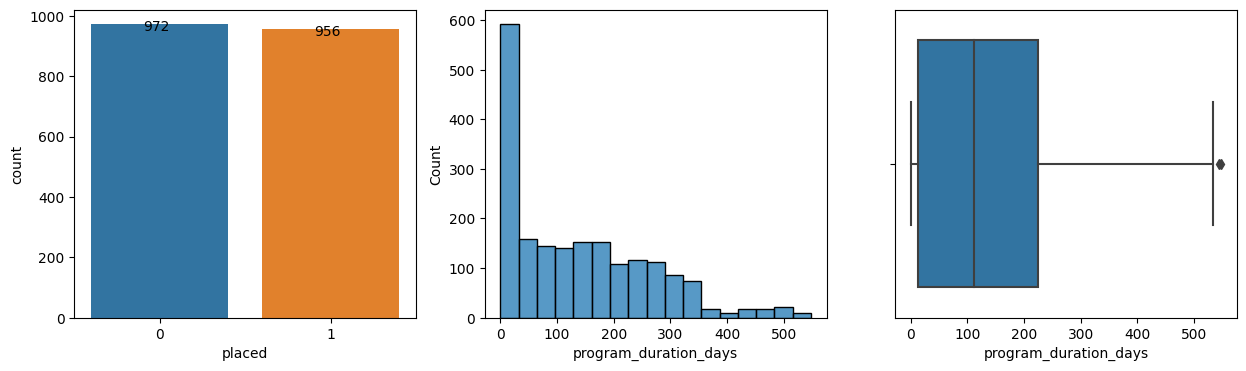

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15,4)
sns.countplot(x='placed',data=df_2, ax=ax[0])
for i, p in enumerate(ax[0].patches):
        ax[0].annotate('{:d}'.format(df_2['placed'].value_counts()[i]), (p.get_x()+0.3, p.get_height()-20))
        
sns.histplot(x='program_duration_days', data=df_2, ax=ax[1])
sns.boxplot(x='program_duration_days', data=df_2, ax=ax[2])

print(f"- Number of missing Program Duration Day values after removing the outliers: {df_2['program_duration_days'].isnull().sum()}")
print(f"- Number of remaining enteries after removing the outliers: {df_2['program_duration_days'].count()}")

#### 4.2.3. Take option 2
Comparing the results of the two options, It seems that dealing with the status feature is a better option. After applying these removal, we can see that the dataset become balanced and the number of remaining samples are larger than those of after removing the outliers after option 1 (1928 vs 1853). Morever all the missing values are removed for the program duration days.

In [15]:
#Take the second option for outlier removal.
df = df_2

In [16]:
print("Number of missing values:")
df.isna().sum()

Number of missing values:


pathrise_status                  0
primary_track                    0
cohort_tag                       6
program_duration_days            0
placed                           0
employment_status              182
highest_level_of_education      42
length_of_job_search            66
biggest_challenge_in_search     20
professional_experience        161
work_authorization_status      221
number_of_interviews           172
number_of_applications           0
gender                         371
race                            13
dtype: int64

### 4.3. Exploration of other featues with missing values

#### 4.3.1. Employment status

There are 182 values missed in the *employment_status* feature.

Count of employement status:
Student               579
Unemployed            504
Employed Full-Time    329
Employed Part-Time    199
Contractor            135
Name: employment_status, dtype: int64


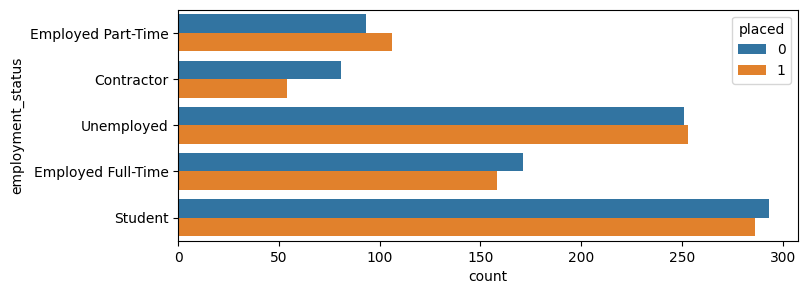

In [17]:
print("Count of employement status:")
print(df['employment_status'].value_counts())

fig = plt.figure()
fig.set_size_inches(8,3)
sns.countplot(y= 'employment_status', data=df, hue = 'placed')
plt.show()

#### 4.3.2. Highest level of education

There are 42 values missed in the *highest_level_of_education* feature.

Count of highest highest_level_of_education:
Bachelor's Degree                   1036
Master's Degree                      605
Doctorate or Professional Degree     104
Some College, No Degree              102
GED or equivalent                     14
Some High School                      13
High School Graduate                  12
Name: highest_level_of_education, dtype: int64


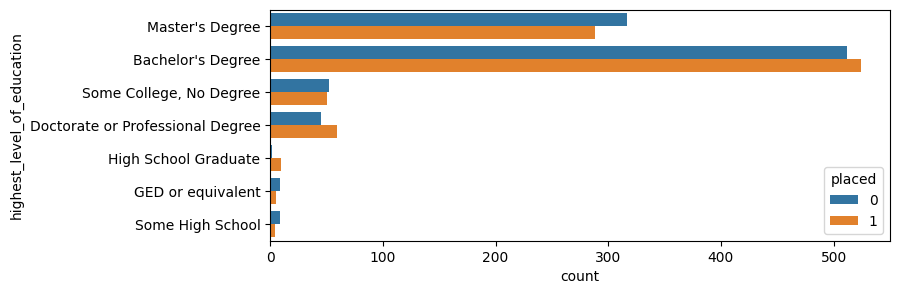

In [18]:
print("Count of highest highest_level_of_education:")
print(df['highest_level_of_education'].value_counts())

fig = plt.figure()
fig.set_size_inches(8,3)
sns.countplot(y= 'highest_level_of_education', data=df, hue = 'placed')
plt.show()

#### 4.3.3. Length of job search

There are 66 values missed in the *length_of_job_search* feature.

Count of length_of_job_search:
Less than one month    621
1-2 months             610
3-5 months             372
6 months to a year     171
Over a year             88
Name: length_of_job_search, dtype: int64


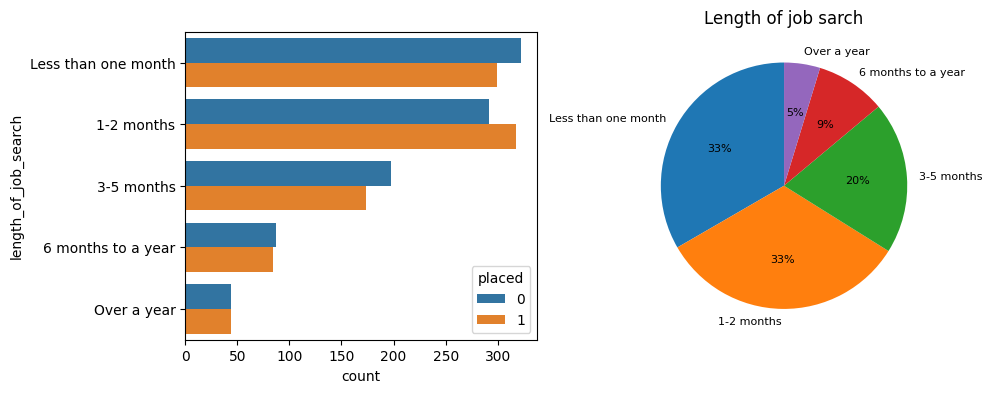

In [19]:
df_length_Job = df['length_of_job_search'].value_counts()
print("Count of length_of_job_search:")
print(df_length_Job)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)

sns.countplot(y= 'length_of_job_search', data=df, hue = 'placed', ax=ax[0])



# Put values and indices into lists.
values = list(df_length_Job.values) # values by list
index = list(df_length_Job.index)   # index by list
# Percentage of job search
ax[1].set_title("Length of job sarch")
ax[1] = plt.pie(values, labels = index , textprops= {'fontsize':8}, startangle= 90, autopct = '%1.0f%%')

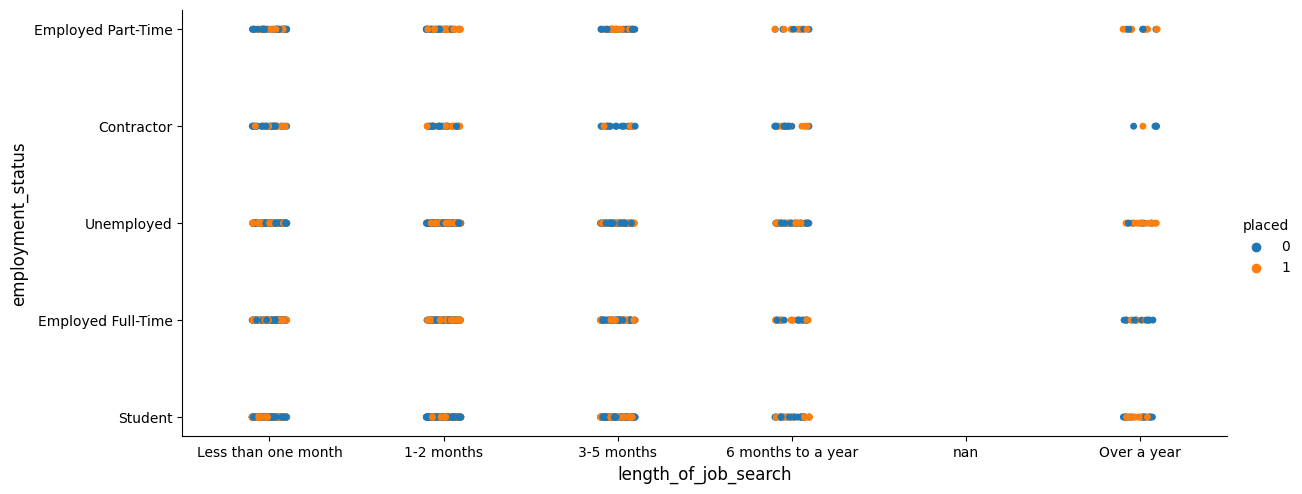

There are 66 missing values in length_of_job_search.


In [20]:
# Length of job search vs employment status
sns.catplot(x='length_of_job_search', y='employment_status',hue='placed', aspect = 2.5, data=df) 
plt.xlabel('length_of_job_search',fontsize=12)
plt.ylabel('employment_status',fontsize=12)
plt.show()

print(f"There are {df['length_of_job_search'].isnull().sum()} missing values in length_of_job_search.")

In [21]:
print("Missing values in length_of_job_search w.r.t. different employment_status:")
for i in set(df['employment_status']): 
    print(f"{i}: {df[df['employment_status'] == i]['length_of_job_search'].isnull().sum()}")
    
print("\nMissing values in employment_status w.r.t. different length_of_job_search:")
for i in set(df['length_of_job_search']): 
    print(f"{i}: {df[df['length_of_job_search'] == i]['employment_status'].isnull().sum()}")

Missing values in length_of_job_search w.r.t. different employment_status:
Employed Part-Time: 6
Contractor: 6
Unemployed: 21
nan: 0
Employed Full-Time: 8
Student: 19

Missing values in employment_status w.r.t. different length_of_job_search:
1-2 months: 59
6 months to a year: 21
Over a year: 4
Less than one month: 54
3-5 months: 38
nan: 0


#### 4.3.4. Biggest challenge in search
There are 20 missing values in biggest_challenge_in_search


Count of biggest_challenge_in_search:
Hearing back on my applications         737
Getting past final round interviews     234
Technical interviewing                  224
Lack of relevant experience             175
Getting past mid-stage interviews       160
Getting past phone screens              148
Figuring out which jobs to apply for    131
Behavioral interviewing                  43
Resume gap                               30
Technical skills                         26
Name: biggest_challenge_in_search, dtype: int64


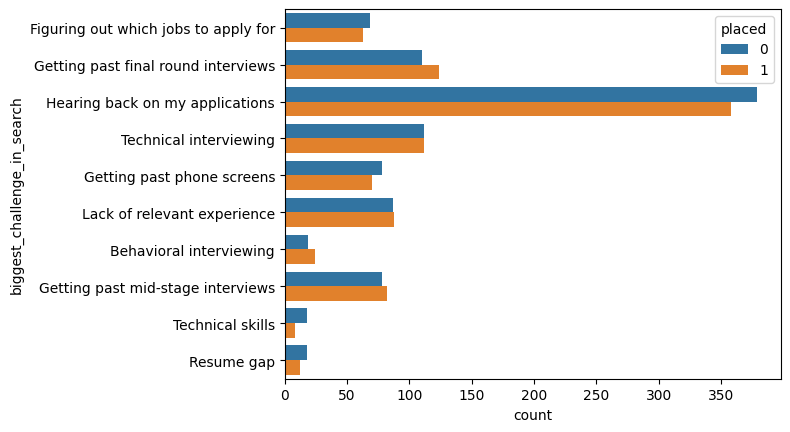

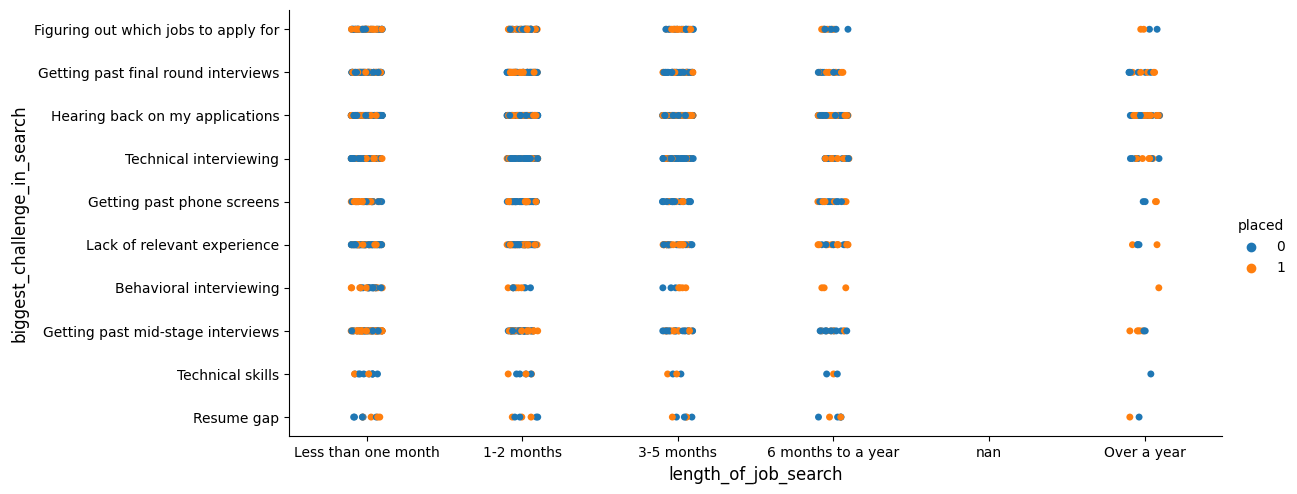

There are 20 missing values in biggest_challenge_in_search


In [22]:
print('Count of biggest_challenge_in_search:')
print(df['biggest_challenge_in_search'].value_counts())

sns.countplot(y='biggest_challenge_in_search' ,data=df, hue = 'placed')

# Biggest challenge in search vs length of job search
sns.catplot(y='biggest_challenge_in_search', x='length_of_job_search',hue="placed", aspect = 2.5 , data=df) #hue='color', aspect=dimenssion(ratio betwwen x and y)
plt.xlabel('length_of_job_search',fontsize=12)
plt.ylabel('biggest_challenge_in_search',fontsize=12)
plt.show()

print(f"There are {df['biggest_challenge_in_search'].isnull().sum()} missing values in biggest_challenge_in_search")

df['biggest_challenge_in_search'].mode()

#### 4.3.4. Professional experience

Count of professional_experience:
1-2 years             640
Less than one year    478
3-4 years             444
5+ years              205
Name: professional_experience, dtype: int64
There are 161 missing values in professional_experience.


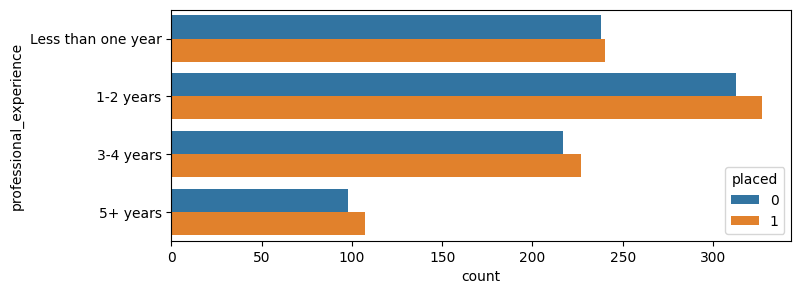

In [23]:
print('Count of professional_experience:')
print(df['professional_experience'].value_counts())

fig = plt.figure()
fig.set_size_inches(8,3)
sns.countplot(y='professional_experience' ,data=df, hue = 'placed')

print(f"There are {df['professional_experience'].isnull().sum()} missing values in professional_experience.")

#### 4.3.5. Work authorization status

Count of work_authorization_status:
Citizen           831
F1 Visa/OPT       488
Green Card        142
F1 Visa/CPT        97
Other              82
H1B                38
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: work_authorization_status, dtype: int64
There are 221 missing values in work_authorization_status.


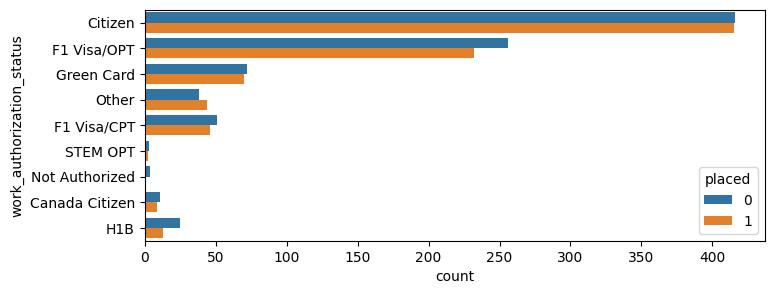

In [24]:
print('Count of work_authorization_status:')
print(df['work_authorization_status'].value_counts())

fig = plt.figure()
fig.set_size_inches(8,3)
sns.countplot(y='work_authorization_status' ,data=df, hue = 'placed')

print(f"There are {df['work_authorization_status'].isnull().sum()} missing values in work_authorization_status.")

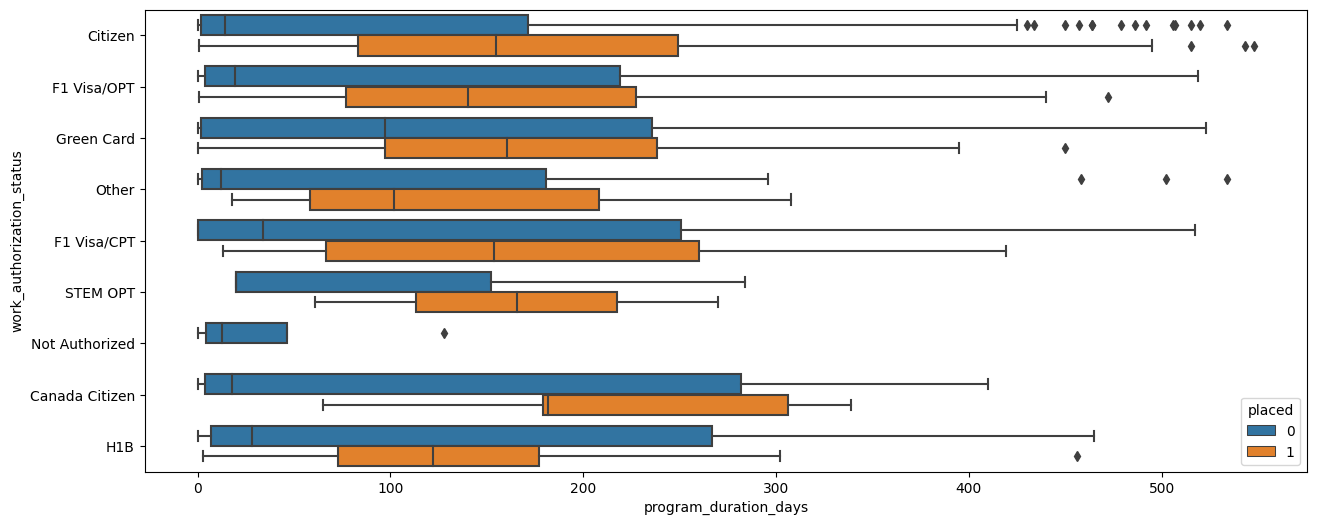

In [25]:
fig = plt.figure()
fig.set_size_inches(15,6)

sns.boxplot(data=df, y='work_authorization_status', x='program_duration_days', hue='placed')
plt.ylabel('work_authorization_status')
plt.xlabel('program_duration_days')
plt.show()

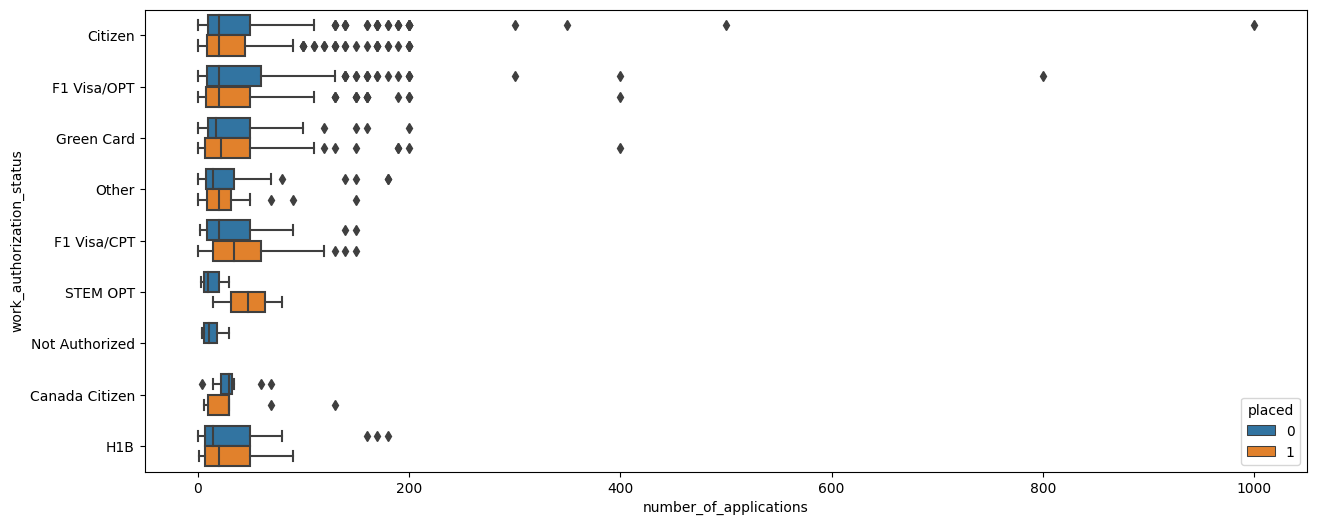

In [26]:
fig = plt.figure()
fig.set_size_inches(15,6)

sns.boxplot(data=df, y='work_authorization_status', x='number_of_applications', hue='placed')
plt.ylabel('work_authorization_status')
plt.xlabel('number_of_applications')
plt.show()

#### 4.3.6. Number of interviews

Count of number_of_interviews:
0.0     579
1.0     388
2.0     227
3.0     144
4.0     142
5.0     112
6.0      59
7.0      48
10.0     18
20.0     12
8.0       5
11.0      4
19.0      3
14.0      3
18.0      3
12.0      2
15.0      2
9.0       2
16.0      2
17.0      1
Name: number_of_interviews, dtype: int64
There are 172 missing values in number_of_interviews.


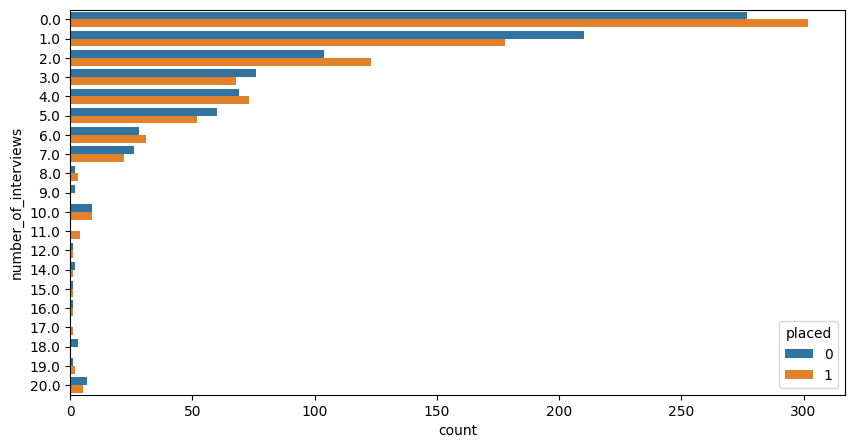

In [27]:
print('Count of number_of_interviews:')
print(df['number_of_interviews'].value_counts())

fig = plt.figure()
fig.set_size_inches(10,5)
sns.countplot(y='number_of_interviews' ,data=df, hue = 'placed')

print(f"There are {df['number_of_interviews'].isnull().sum()} missing values in number_of_interviews.")

<AxesSubplot: xlabel='number_of_interviews', ylabel='biggest_challenge_in_search'>

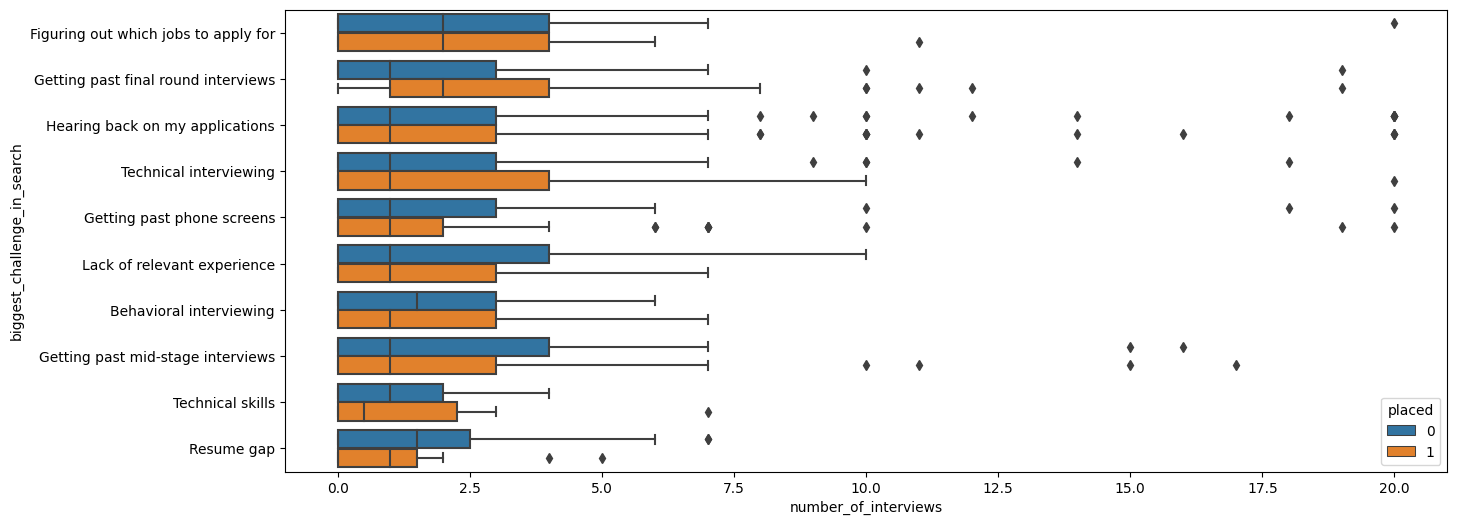

In [28]:
fig = plt.figure()
fig.set_size_inches(15,6)

sns.boxplot(y='biggest_challenge_in_search',x='number_of_interviews',data=df, hue='placed')

#### 4.3.6. Number of applications

<AxesSubplot: xlabel='number_of_applications'>

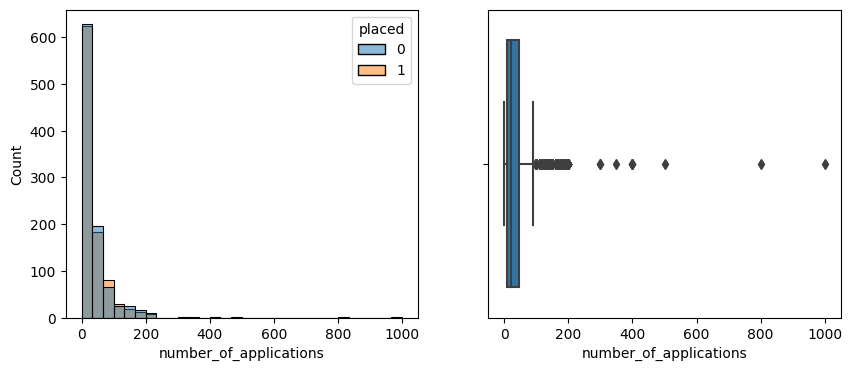

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)
sns.histplot(x='number_of_applications', data=df, hue = 'placed', bins=30, ax=ax[0])
sns.boxplot(x='number_of_applications',data=df, ax=ax[1])

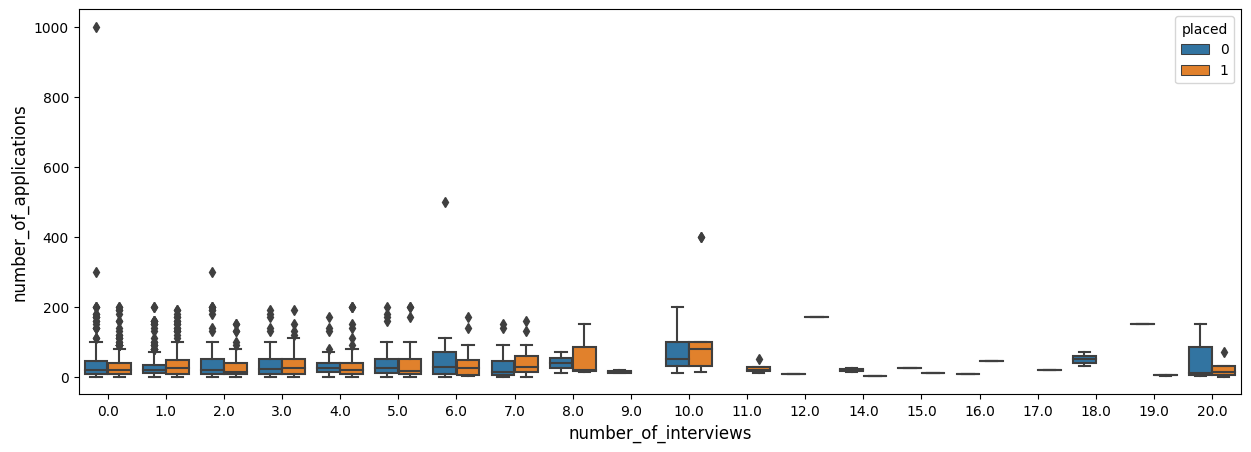

In [30]:
fig = plt.figure()
fig.set_size_inches(15,5)

sns.boxplot(y='number_of_applications', x='number_of_interviews',hue='placed',  data=df) 
plt.xlabel('number_of_interviews',fontsize=12)
plt.ylabel('number_of_applications',fontsize=12)
plt.show()

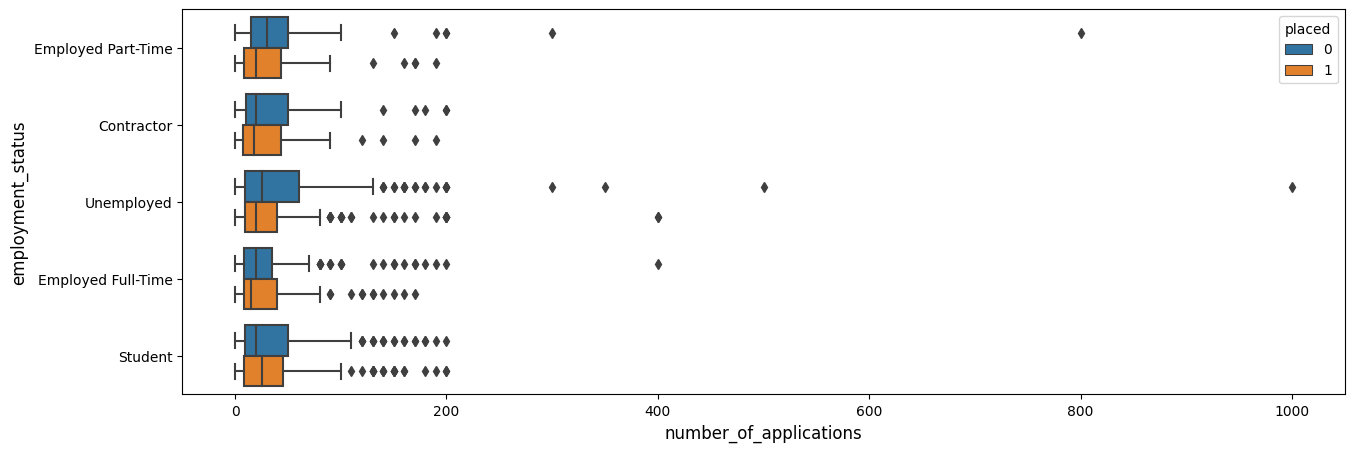

In [31]:
fig = plt.figure()
fig.set_size_inches(15,5)

sns.boxplot(x='number_of_applications', y='employment_status',hue='placed', data=df) 
plt.ylabel('employment_status',fontsize=12)
plt.xlabel('number_of_applications',fontsize=12)
plt.show()

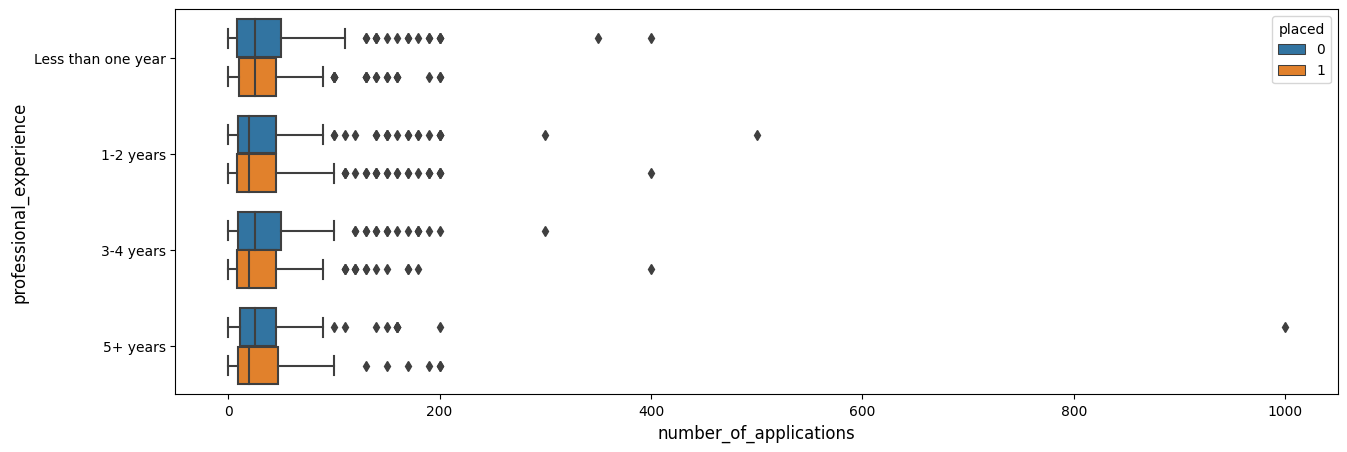

In [32]:
fig = plt.figure()
fig.set_size_inches(15,5)

sns.boxplot(x='number_of_applications', y='professional_experience', hue='placed', data=df) 
plt.ylabel('professional_experience',fontsize=12)
plt.xlabel('number_of_applications',fontsize=12)
plt.show()

#### 4.3.7. Gender

Count of gender:
Male                        1134
Female                       410
Decline to Self Identify      10
Non-Binary                     3
Name: gender, dtype: int64
There are 371 missing values in gender.


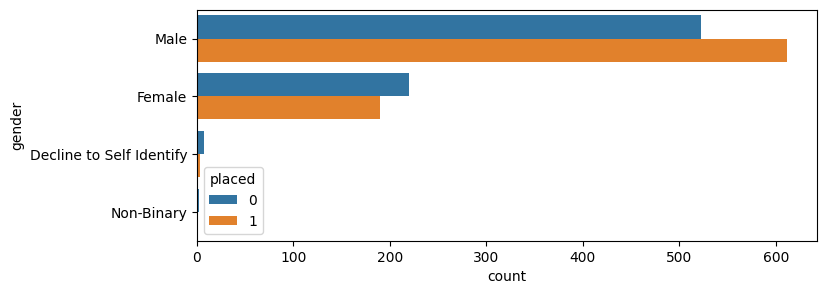

In [33]:
print('Count of gender:')
print(df['gender'].value_counts())

fig = plt.figure()
fig.set_size_inches(8,3)
sns.countplot(y='gender' ,data=df, hue='placed')

print(f"There are {df['gender'].isnull().sum()} missing values in gender.")

#### 4.3.8. Race

Count of race:
East Asian or Asian American                  703
South Asian or Indian American                420
Non-Hispanic White or Euro-American           414
Latino or Hispanic American                   119
Black, Afro-Caribbean, or African American     91
Two or More Races                              68
Middle Eastern or Arab American                52
Decline to Self Identify                       45
Native American or Alaskan Native               3
Name: race, dtype: int64
There are 13 missing values in race.


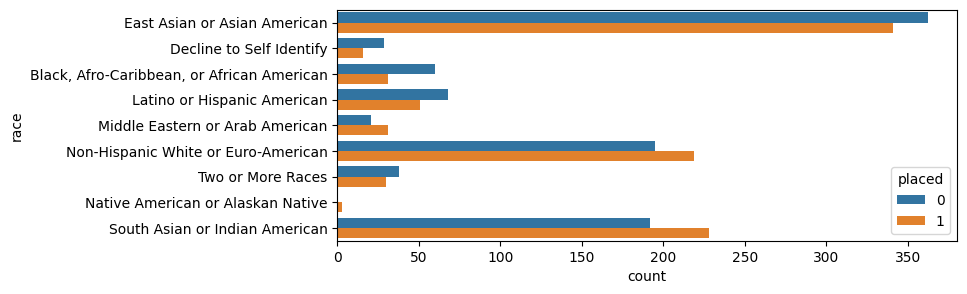

In [34]:
print('Count of race:')
print(df['race'].value_counts())

fig = plt.figure()
fig.set_size_inches(8,3)
sns.countplot(y='race' ,data=df, hue='placed')

print(f"There are {df['race'].isnull().sum()} missing values in race.")

### 4.4. Segmenting some columns

#### 4.4.1. Cohort tag

Segmenting cohort_tag based on year (18,19,20).

In [35]:
#Segmenting cohort_tag based on year (18,19,20) 
df["cohort_tag"]= df["cohort_tag"].replace({'APR18A':'18', 'APR18B':'18',
'APR19A':'19','APR19B':'19','APR20A':'20','AUG18A':'18','AUG19A':'19','AUG19B':'19', 
'DEC18A':'18','FEB18A':'18','JAN18A':'18','JUN18A':'18','SEP18C':'18','MAR19B':'19','FEB20B':'20','MAR20A':'20','FEB20a':'20','OCT21A':'20',
'MAR18A':'18','MAY18A':'19','NOV18A':'18','OCT18A':'18','OCT18B':'18','SEP18A':'18','SEP18B':'18', 'AUG19C':'19','DEC19A':'19','FEB19A':'19',
'FEB19B':'19','JAN19A':'19','JAN19B':'19','JUL19A':'19','JAN20A':'20','FEB20A':'20',
'JUL19B':'19','JUN19A':'19','JUN19B':'19','MAR19A':'19','MAY19A':'19','MAY19B':'19','NOV19A':'19','NOV19B':'19', 
'NOV19A':'19','NOV19B':'19','OCT19A':'19','OCT19B':'19','SEP19A':'19','SEP19B':'19','JAN20B':'20'})

In [36]:
df['cohort_tag'].value_counts()

19    1099
18     607
20     216
Name: cohort_tag, dtype: int64

In [37]:
#df['cohort_tag'].isnull().sum()

In [38]:
# Cohort_tag filling missing values 
#df['cohort_tag'].fillna(value='19',inplace=True)

#### 4.4.2. Highest level of education
Segment this column to smaller number of categories to make the analysis simpler.

In [39]:
#segment this column to analyze it easier
df['highest_level_of_education'] = df['highest_level_of_education'].replace
({'Bachelor\'s Degree':'Graduate','Some High School':'Undergraduate','GED or equivalent':'Undergraduate',
  'Doctorate or Professional Degree':'Postgraduate','Master\'s Degree':'Postgraduate','Some college, No Degree':'Undergraduate',
 'High School Graduate':'Undergraduate'})

{"Bachelor's Degree": 'Graduate',
 'Some High School': 'Undergraduate',
 'GED or equivalent': 'Undergraduate',
 'Doctorate or Professional Degree': 'Postgraduate',
 "Master's Degree": 'Postgraduate',
 'Some college, No Degree': 'Undergraduate',
 'High School Graduate': 'Undergraduate'}

#### 4.4.3 Length of job search and professional_experience
Segment these column with numberical values.

In [40]:
#Segmenting for length_of_job_search
df["length_of_job_search"]= df["length_of_job_search"].replace({'Less than one month':0.5,"1-2 months":1.5 ,'3-5 months':4, '6 months to a year':9,'Over a year':13 })
df['length_of_job_search'].value_counts()

0.5     621
1.5     610
4.0     372
9.0     171
13.0     88
Name: length_of_job_search, dtype: int64

In [41]:
#Segmenting for professional experience
df["professional_experience"]=df["professional_experience"].replace({'1-2 years':1.5,'3-4 years':3.5,'5+ years':6,'Less than one year':0.5})
df["professional_experience"].value_counts()

1.5    640
0.5    478
3.5    444
6.0    205
Name: professional_experience, dtype: int64

### 4.5. Filling the missing values

I fill the missing values for the explored features with the mean and modes conditioned on seme other relevant features based on my exploration results. 

In [42]:
# missing values by themean and mode

df['cohort_tag']=df['cohort_tag'].replace(np.nan,df['cohort_tag'].mode()[0] )
df['program_duration_days']=df['program_duration_days'].replace(np.nan,df['program_duration_days'].mode()[0] )
df['biggest_challenge_in_search']=df['biggest_challenge_in_search'].replace(np.nan, df['biggest_challenge_in_search'].mode()[0])
df['highest_level_of_education']=df['highest_level_of_education'].replace(np.nan, df['highest_level_of_education'].mode()[0])
df['professional_experience']=df['professional_experience'].replace(np.nan, df['professional_experience'].mode()[0])
df['employment_status']=df['employment_status'].replace(np.nan, df['employment_status'].mode()[0])
df['number_of_interviews']=df['number_of_interviews'].replace(np.nan, int(df['number_of_interviews'].mean()))
df['length_of_job_search']=df['length_of_job_search'].replace(np.nan, df['length_of_job_search'].mode()[0])
df['work_authorization_status']=df['work_authorization_status'].replace(np.nan, df['work_authorization_status'].mode()[0])
df['number_of_interviews']=df['number_of_interviews'].replace(np.nan,df['cohort_tag'].mode()[0] )
df['number_of_applications']=df['number_of_applications'].replace(np.nan,df['cohort_tag'].mode()[0] )
df['gender']=df['gender'].replace(np.nan,df['gender'].mode()[0] )
df['race']=df['race'].replace(np.nan,df['race'].mode()[0] )

In [43]:
df.isna().sum()

pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

<AxesSubplot: >

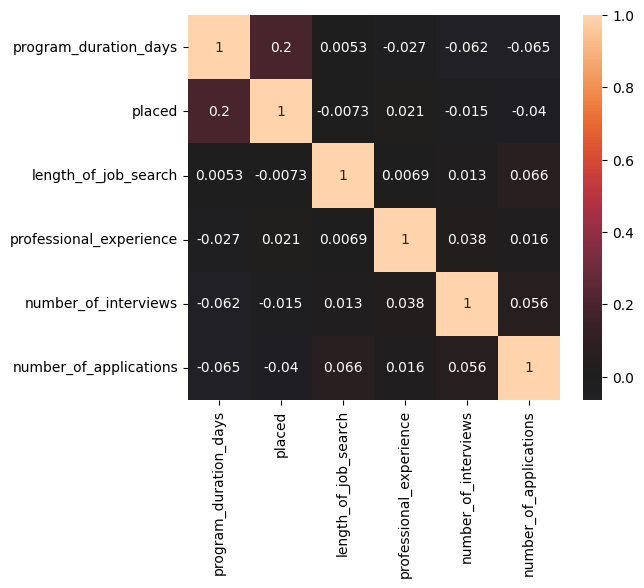

In [44]:
# Correlation Matrix

plt.figure(figsize=(6,5))
corrmat= df.corr() 
sns.heatmap(corrmat,annot=True, center=0)

In [45]:
# get dummy the categorical features
df_dummy =pd.get_dummies(df[['pathrise_status','primary_track','cohort_tag','employment_status','highest_level_of_education','length_of_job_search','biggest_challenge_in_search','professional_experience','work_authorization_status',
                         'gender','race']])

In [46]:
df_dummy

,length_of_job_search,professional_experience,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Data,primary_track_Design,...,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0.5,0.5,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0.5,0.5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.5,1.5,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1.5,3.5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.5,3.5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0.5,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2538,0.5,6.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2539,9.0,6.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2540,4.0,1.5,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
df = df.drop(['pathrise_status','primary_track','cohort_tag','employment_status','highest_level_of_education','length_of_job_search','biggest_challenge_in_search',
              'professional_experience','work_authorization_status','gender','race'],axis = 1)

In [48]:
df

,program_duration_days,placed,number_of_interviews,number_of_applications
2,0.0,0,0.0,0
3,0.0,0,5.0,25
4,89.0,1,10.0,100
5,0.0,0,5.0,100
6,0.0,0,0.0,9
...,...,...,...,...
2535,0.0,0,0.0,20
2538,118.0,0,1.0,25
2539,457.0,0,4.0,15
2540,488.0,0,1.0,7


In [49]:
# concat the datasets

df = pd.concat([df_dummy,df],axis = 1)

In [50]:
df

,length_of_job_search,professional_experience,pathrise_status_Closed Lost,pathrise_status_Deferred,pathrise_status_Placed,pathrise_status_Withdrawn,pathrise_status_Withdrawn (Failed),pathrise_status_Withdrawn (Trial),primary_track_Data,primary_track_Design,...,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,program_duration_days,placed,number_of_interviews,number_of_applications
2,0.5,0.5,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.0,0,0.0,0
3,0.5,0.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,5.0,25
4,1.5,1.5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,89.0,1,10.0,100
5,1.5,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,5.0,100
6,0.5,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,0.5,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.0,0,0.0,20
2538,0.5,6.0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,118.0,0,1.0,25
2539,9.0,6.0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,457.0,0,4.0,15
2540,4.0,1.5,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,488.0,0,1.0,7


In [51]:
df = df.astype(float)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2 to 2543
Data columns (total 59 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                   --------------  -----  
 0   length_of_jo

### 5. Save the preprocessed dataset

In [53]:
df.to_csv('PreprocessedPathrise1_dataset.csv')